In [18]:
import pandas as pd
import numpy as np
import collections
import re
import operator #
import matplotlib.pyplot as plt
from itertools import islice
%matplotlib inline

In [19]:
from dateutil.parser import parse
def datemaker(date):
    dt = parse(date)
    return dt

In [20]:
# Morning till 11:59 | Afternoon 12-3pm | Evening 3pm-8:59pm | Night after 9
def timeOfDay(date):
    #dt = parse(date)
    if date.hour < 12:
        return "Morning"
    if date.hour>= 12 and date.hour <= 15:
        return "Afternoon"
    if date.hour> 15 and date.hour < 21:
        return "Evening"
    else:
        return "Night"

In [21]:
def usergroup(userID):
    if userDict[userID].TOD.value_counts(ascending=False).index.tolist()[0] is 'Morning':
        return
    if userDict[userID].TOD.value_counts(ascending=False).index.tolist()[0] is 'Afternoon':
        return
    if userDict[userID].TOD.value_counts(ascending=False).index.tolist()[0] is 'Evening':
        return
    if userDict[userID].TOD.value_counts(ascending=False).index.tolist()[0] is 'Night':
        return

In [5]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/Data/test.txt", sep="\t")
mydict = {}
data.shape

(3614506, 5)

In [6]:
# timedf = data[["AnonID", "QueryTime"]]
# timedf.head()
# timedf['QueryDate'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.date())
# timedf['QueryTimeStamp'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.time())
# timedf['TOD'] = timedf['QueryTimeStamp'].apply(lambda x: timeOfDay(x))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
timedf.head()

,AnonID,QueryTime,QueryDate,QueryTimeStamp,TOD
0,479,2006-03-01 16:01:20,2006-03-01,16:01:20,Evening
1,479,2006-03-02 14:48:55,2006-03-02,14:48:55,Afternoon
2,479,2006-03-03 22:37:46,2006-03-03,22:37:46,Night
3,479,2006-03-03 22:42:42,2006-03-03,22:42:42,Night
4,479,2006-03-03 22:42:42,2006-03-03,22:42:42,Night


In [8]:
userlist = data.AnonID.unique()
len(userlist) #No of unique users

66000

In [1]:
# for user in userlist:
#     print(user)

In [9]:
#for every user, which TOD has highest frequency
#    cluster user based on type of user (based on TOD)
# Each User | TOD | Freq

In [16]:
# total = 0
# for i in data.AnonID:
#     if i in mydict: 
#         mydict[i] += 1
#     else: 
#         mydict[i] = 1
#     total+=1

In [50]:
len(mydict)

66000

In [51]:
# #Verifying dictionary is correct
# sum =0
# users =""
# for k,v in mydict.items():
#     sum+=v   
# print(sum) #Should be same as shape[0]

# #Changing to % of total
# for k,v in mydict.items():
#     mydict[k] = (v/sum) * 100

3614506


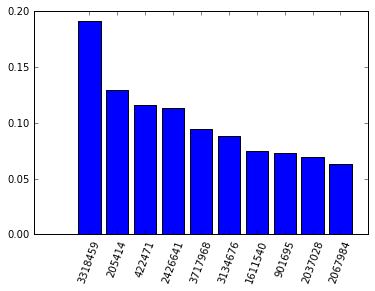

In [52]:
#Find the most common users in this list to analyze their moves
commonUsers = sorted(mydict.items(), key=lambda x:-x[1])[:10]
commonuserList = [i[0] for i in commonUsers]
commonuserFreq = [i[1] for i in commonUsers]
plt.bar(range(len(commonuserList)), commonuserFreq, align="center")
plt.xticks(range(len(commonuserList)) , commonuserList, rotation = 70)
plt.show()

In [23]:
from difflib import SequenceMatcher

def similar(a, b):
    return round(SequenceMatcher(None, a, b).ratio(),2)

In [52]:
#Exploring our best user
mostActive = data[data.AnonID == commonUsers[0][0]]
mAunique = mostActive.Query.unique()
(mostActive.AnonID.count() - mostActive.ItemRank.count())/mostActive.AnonID.count()

0.17054151624548736

17.05% of the queries lead to no clicks

In [53]:
mAqueries = {}
for i in mostActive.Query:
    if i in mAqueries: 
        mAqueries[i] += 1
    else: 
        mAqueries[i] = 1

In [54]:
mAqueries = sorted(mAqueries.items(), key=lambda x:-x[1])

In [55]:
keyys = 0
totalsingle = 0
for i in mAqueries:
    #print(i[1]) prints tuple (x,y)
    if i[1] == 1:
        #print(i[0]) prints the query
        #Total number of elements that were searched once.
        totalsingle += mostActive.loc[mostActive.Query == i[0]].Query.count()
        #Total number of elements that lead to a NaN ClickURL
        keyys += mostActive.loc[mostActive.Query == i[0]].ClickURL.isnull().count()

In [56]:
onetimeSuccess = (totalsingle - keyys)/totalsingle
onetimeSuccess

0.0

No search result that was searched for once worked properly. Why?

In [57]:
import enchant
d = enchant.Dict("en_US")
cspell=0
csearch=[]
wspell=0
wsearch=[]
for i in mAqueries:
    ssum=0
    for word in i[0].split():
        ssum+= d.check(word)
    if ssum==len(i[0].split()):
        csearch+=i[0],
        cspell+=1
    else:
        wsearch+=i[0]
        wspell+=1

In [58]:
(wspell/(cspell+wspell))

0.421551724137931

42.2% of these NaN return searches are mispelled. 57.8% is correctly typed, but no result still?  
From a high level view, we can see a lot of x-rated material.

In [59]:
vulgar = ['porn', 'dick', 'sexy', 'sex', 'pussy', 'ass', 'fuck', 'sperm']
vcount = 0
allvcount = 0
for i in csearch:
    for v in vulgar:
        if v in i: 
            vcount+=1


for i in mostActive.Query:
    for v in vulgar:
        if v in i: 
            allvcount+=1

In [60]:
print(vcount)
print(allvcount)

359
3020


In [61]:
vcount/cspell #Out of the correctly spelled searches

0.5350223546944859

In [62]:
(allvcount)/mostActive.Query.count() #Out of the total searches

0.43610108303249095

53.5% of the correctly spelled words were vulgar and they did not have any ClickURL probably because the user didn't want to leave an internet trace for such things! 

Leaving out the vuglar search queries we can see that is gets rid of most of the NaNs and mostly leaves the mispelled queries.

In [63]:
#decent = mostActive[mostActive['Query'].isin(vulgar)]
#decent = mostActive[mostActive['Query'].str.contains(vulgar)]
mAdecent = mostActive[~mostActive['Query'].str.contains('|'.join(vulgar))]

In [64]:
mAdecent.count()

AnonID       4503
Query        4503
QueryTime    4503
ItemRank     3647
ClickURL     3647
dtype: int64

In [ ]:
mA

In [66]:
print(data.QueryTime[0])
datemaker(data.QueryTime[0])

2006-03-01 16:01:20


datetime.datetime(2006, 3, 1, 16, 1, 20)

In [27]:
timeOfDay(data.QueryTime[0])

'Evening'

In [83]:
tot_timedict = {}
for i in data.QueryTime:
    tod = timeOfDay(i)
    if tod in tot_timedict:
        tot_timedict[tod] += 1
    else: 
        tot_timedict[tod] = 1

In [80]:
#data[AnonID='3318459']
for i in commonUsers:
    #print(i[0])
    temp = data.loc[data['AnonID'] == i[0]]
    for j in temp.QueryTime:
        tod = timeOfDay(j)
        if tod in mAtimedict:
            mAtimedict[tod] += 1
        else: 
            mAtimedict[tod] = 1
        timetotal+=1

In [88]:
print(tot_timedict)
print(mAtimedict)

{'Night': 682431, 'Evening': 1160585, 'Afternoon': 732270, 'Morning': 1039220}
{'Night': 17495, 'Morning': 46400, 'Evening': 32471, 'Afternoon': 20659}


In [102]:
df = data
df['TOD'] = df.QueryTime.apply(lambda x: timeOfDay(x))
df['Time'] = df.QueryTime.apply(lambda x: datemaker(x))
#df['TOD'] = timeOfDay(df.QueryTime)

In [ ]:
df.head()

In [ ]:
dates = matplotlib.dates.date2num(list_of_datetimes)
plot_date(dates, values)